# TODO:
Utilizar a base Wine como exemplo e utilizar apenas o max_depth como exemplo de hyperparam, falae sobre o comportamento que muda ao mudar hiperparâmetro.

In [6]:
import pandas as pd

path = './wine.data'

attribute_names = [
  'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
  'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
  'OD280/OD315 of diluted wines', 'Proline'
]

dataset = pd.read_csv(path, names=attribute_names)

dataset

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


0.9444444444444444


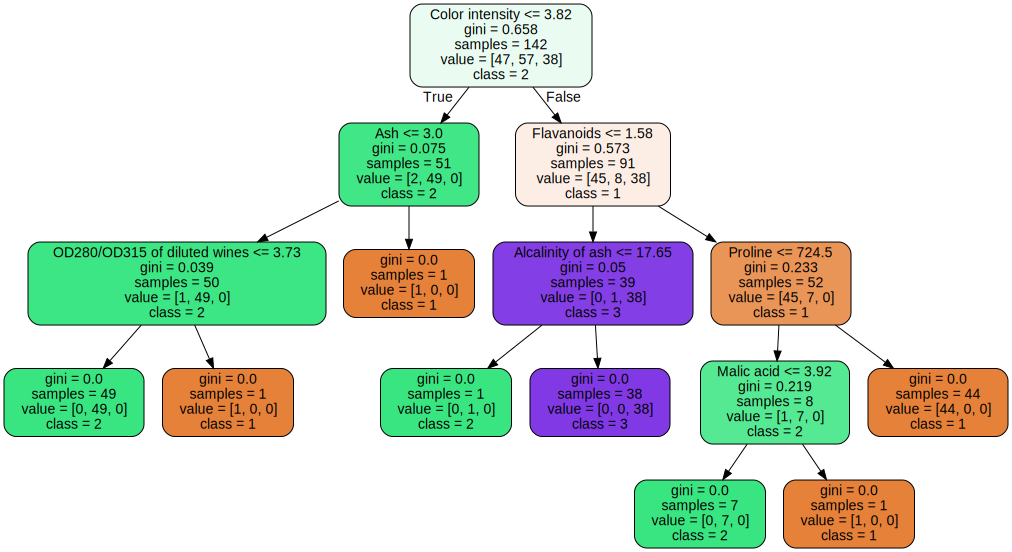

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import export_graphviz
import graphviz

SEED = 42
np.random.seed(SEED)

X = dataset.iloc[:, 1:]
y = dataset.Class

X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.2,
  random_state=SEED,
  stratify=y
)

classifier = DecisionTreeClassifier(
  random_state=SEED,
  max_depth=None
)

classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))

dot_data = export_graphviz(
  classifier,
  out_file=None, # path que o arquivo será salvo, None em notebooks
  filled=True, # colore as folhas de acordo com o grau de certeza
  rounded=True,
  feature_names=X.columns,
  class_names=["1", "2", "3"]
)

chart = graphviz.Source(dot_data)
chart
